# Erdos-Renyi Graphs

Code examples from [Think Complexity, 2nd edition](http://greenteapress.com/wp/complexity2), Chapter 2

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [732]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

import networkx as nx
import numpy as np

# colors from our friends at http://colorbrewer2.org
COLORS = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462',
          '#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']

In [733]:
from thinkstats2 import RandomSeed
RandomSeed(17)

## Directed graph

The first example is a directed graph that represents a social network with three nodes.

In [734]:
G = nx.DiGraph()
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Chuck')
G.nodes()

['Chuck', 'Bob', 'Alice']

Here's how we add edges between nodes.

In [735]:
G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Chuck')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Chuck')
G.edges()

[('Bob', 'Chuck'), ('Bob', 'Alice'), ('Alice', 'Chuck'), ('Alice', 'Bob')]

And here's how to draw the graph.

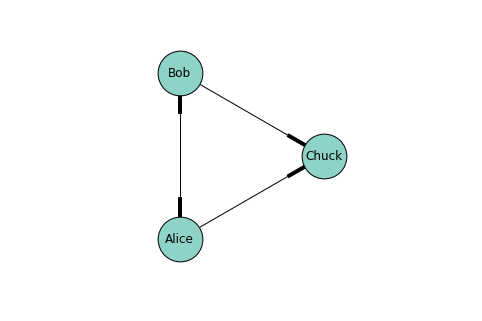

In [736]:
nx.draw_circular(G, 
                 node_color=COLORS[0], 
                 node_size=2000, 
                 with_labels=True)
plt.axis('equal')
plt.savefig('chap02-1.pdf')

**Exercise:**  Add another node and a few more edges and draw the graph again.

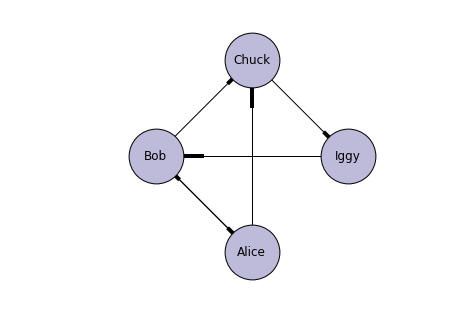

In [737]:
# Solution goes here
G.add_node('Iggy')
G.add_edge('Chuck','Iggy')
G.add_edge('Iggy','Bob')
nx.draw_circular(G,
                node_color=COLORS[2],
                node_size=3000,
                with_labels=True)
plt.axis('equal')
plt.savefig('chap02-11.pdf')

## Undirected graph

The second example is an undirected graph that represents cities and the driving times between them.

`pos` is a dictionary that maps from each city to its coordinates.

In [738]:
pos = dict(Albany=(-74, 43),
          Boston=(-71, 42),
          NYC=(-74, 41),
          Philly=(-75, 40))
pos['Albany']

(-74, 43)

We can use the keys in `pos` to add nodes to the graph.

In [739]:
G = nx.Graph()
G.add_nodes_from(pos)
G.nodes()

['Albany', 'Philly', 'NYC', 'Boston']

`drive_times` is a dictionary that maps from pairs of cities to the driving times between them.

In [740]:
drive_times = {('Albany', 'Boston'): 3,
               ('Albany', 'NYC'): 4,
               ('Boston', 'NYC'): 4,
               ('NYC', 'Philly'): 2}

We can use the keys from `drive_times` to add edges to the graph.

In [741]:
G.add_edges_from(drive_times)
G.edges()

[('Albany', 'NYC'), ('Albany', 'Boston'), ('Philly', 'NYC'), ('NYC', 'Boston')]

Now we can draw the graph using `pos` to indicate the positions of the nodes, and `drive_times` to label the edges.

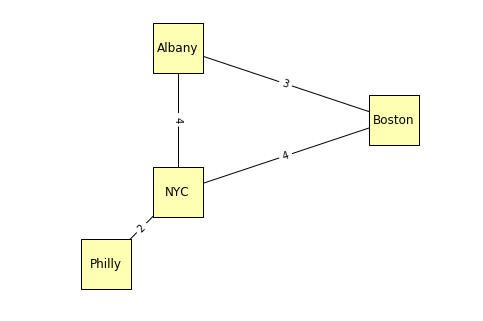

In [742]:
nx.draw(G, pos, 
        node_color=COLORS[1], 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, pos, 
                             edge_labels=drive_times)

plt.axis('equal')
plt.savefig('chap02-2.pdf')

**Exercise:**  Add another city and at least one edge.

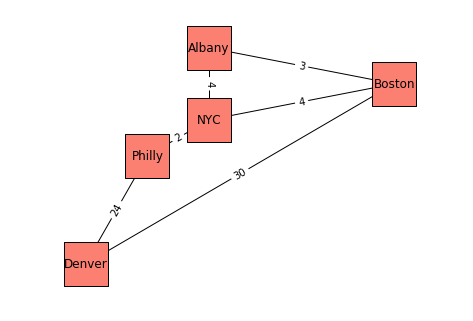

In [743]:
# Solution goes here
pos['Denver']=(-76,37)
G.add_node('Denver')
drive_times[('Denver','Boston')]=30
drive_times[('Denver','Philly')]=24
G.add_edge('Denver','Boston')
G.add_edge('Denver','Philly')
nx.draw(G, pos,
       node_color=COLORS[3],
       node_shape='s',
       node_size=2000,
       with_labels=True)
nx.draw_networkx_edge_labels(G, pos, 
                             edge_labels=drive_times)

plt.savefig('chap02-22.pdf')

## Complete graph

To make a complete graph, we use a generator function that iterates through all pairs of nodes.

In [744]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

`make_complete_graph` makes a `Graph` with the given number of nodes and edges between all pairs of nodes.

In [745]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

Here's a complete graph with 10 nodes:

In [746]:
complete = make_complete_graph(10)
len(complete.nodes())

10

And here's what it looks like.

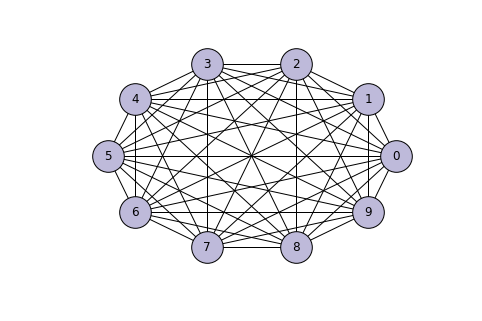

In [747]:
nx.draw_circular(complete, 
                 node_color=COLORS[2], 
                 node_size=1000, 
                 with_labels=True)
plt.savefig('chap02-3.pdf')

The `neighbors` method returns a list of neighbors for a given node.

In [748]:
complete.neighbors(0)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

**Exercise:** Make and draw complete directed graph with 5 nodes.

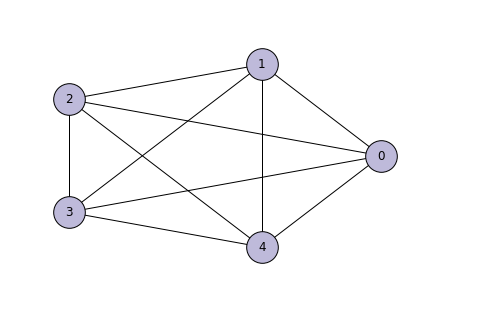

In [749]:
# Solution goes here
complete = make_complete_graph(5)
nx.draw_circular(complete, 
                 node_color=COLORS[2], 
                 node_size=1000, 
                 with_labels=True)
plt.savefig('chap02-31.pdf')

## Random graphs

Next we'll make a random graph where the probability of an edge between each pair of nodes is $p$.

The helper function `flip` returns True with probability `p` and False with probability `1-p`

In [750]:
from numpy.random import random

def flip(p):
    return random() < p

`random_pairs` is a generator function that enumerates all possible pairs of nodes and yields each one with probability `p` 

In [751]:
def random_pairs(nodes, p):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i<j and flip(p):
                yield u, v

`make_random_graph` makes an ER graph where the probability of an edge between each pair of nodes is `p`.

In [752]:
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

Here's an example with `n=10` and `p=0.3`

In [753]:
random_graph = make_random_graph(10, 0.3)
len(random_graph.edges())

17

And here's what it looks like:

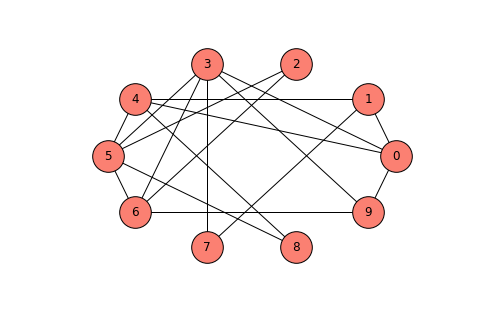

In [754]:
nx.draw_circular(random_graph, 
                 node_color=COLORS[3], 
                 node_size=1000, 
                 with_labels=True)
plt.savefig('chap02-4.pdf')

## Connectivity

To check whether a graph is connected, we'll start by finding all nodes that can be reached, starting with a given node:

In [755]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

In the complete graph, starting from node 0, we can reach all nodes:

In [756]:
reachable_nodes(complete, 0)

{0, 1, 2, 3, 4}

In the random graph we generated, we can also reach all nodes (but that's not always true):

In [757]:
reachable_nodes(random_graph, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

We can use `reachable_nodes` to check whether a graph is connected:

In [758]:
def is_connected(G):
    start = next(G.nodes_iter())
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

Again, the complete graph is connected:

In [759]:
is_connected(complete)

True

But if we generate a random graph with a low value of `p`, it's not:

In [760]:
random_graph = make_random_graph(10, 0.1)
len(random_graph.edges())

6

In [761]:
is_connected(random_graph)

False

**Exercise:** What do you think it means for a directed graph to be connected?  Write a function that checks whether a directed graph is connected.

In [762]:
# Solution goes here
def directed_reachable_nodes(G, start) :
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.successors(node))
    return seen

def directed_is_connected(G):
    for node in G.nodes_iter():
        reachable = directed_reachable_nodes(G, node)
        if len(reachable) < len(G.nodes)-1:
            return False
    return True

## Probability of connectivity

Now let's estimare the probability that a randomly-generated ER graph is connected.

This function takes `n` and `p`, generates `iters` graphs, and returns the fraction of them that are connected.

In [763]:
def prob_connected(n, p, iters=100):
    count = 0
    for i in range(iters):
        random_graph = make_random_graph(n, p)
        if is_connected(random_graph):
            count += 1
    return count/iters

With `n=10` and `p=0.3`, the probability of being connected is about 65%.

In [764]:
n = 10
prob_connected(n, 0.3, iters=10000)

0.6494

According to Erdos and Renyi, the critical value of `p` for `n=10` is about 0.23. 

In [765]:
pstar = np.log(n) / n
pstar

0.23025850929940458

So let's plot the probability of connectivity for a range of values for `p`

In [766]:
ps = np.logspace(-1.3, 0, 11)
ps

array([ 0.05011872,  0.0676083 ,  0.09120108,  0.12302688,  0.16595869,
        0.22387211,  0.30199517,  0.40738028,  0.54954087,  0.74131024,  1.        ])

I'll estimate the probabilities with `iters=1000`

In [767]:
ys = [prob_connected(n, p, 1000) for p in ps]

for p, y in zip(ps, ys):
    print(p, y)

0.0501187233627 0.0
0.0676082975392 0.0
0.0912010839356 0.004
0.123026877081 0.016
0.165958690744 0.11
0.223872113857 0.346
0.30199517204 0.664
0.407380277804 0.899
0.549540873858 0.989
0.741310241301 1.0
1.0 1.0


And then plot them, adding a vertical line at the computed critical value

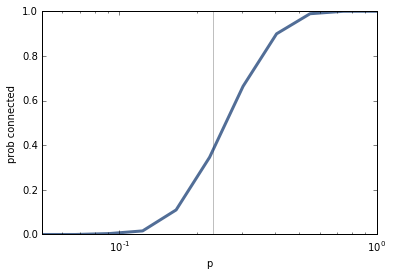

In [768]:
import thinkplot

thinkplot.vlines([pstar], 0, 1, color='gray')
thinkplot.plot(ps, ys)
thinkplot.config(xlabel='p', ylabel='prob connected', xscale='log', xlim=[ps[0], ps[-1]])
plt.savefig('chap02-5.pdf')

We can run the same analysis for a few more values of `n`.

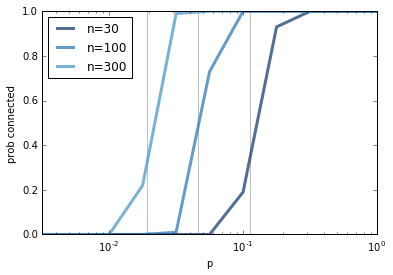

In [769]:
ns = [30, 100, 300]
ps = np.logspace(-2.5, 0, 11)

thinkplot.preplot(len(ns))
for n in ns:
    pstar = np.log(n) / n
    thinkplot.vlines([pstar], 0, 1, color='gray')

    ys = [prob_connected(n, p) for p in ps]
    thinkplot.plot(ps, ys, label='n=%d' % n)

thinkplot.config(xlabel='p', ylabel='prob connected',
                 xscale='log', xlim=[ps[0], ps[-1]],
                 loc='upper left')
plt.savefig('chap02-6.pdf')

As `n` increases, the critical value gets smaller and the transition gets more abrupt.

## Exercises

**Exercise:** In Chapter 2 we analyzed the performance of `reachable_nodes` and classified it in $O(n + m)$, where $n$ is the number of nodes and $m$ is the number of edges.  Continuing the
analysis, what is the order of growth for `is_connected`?

    def is_connected(G):
        start = next(G.nodes_iter())
        reachable = reachable_nodes(G, start)
        return len(reachable) == len(G)

In [770]:
# Solution goes here
'''G.nodes_iter() takes constant time O(1), reachable_nodes() takes O(n+m),
reachable is a set so len(reachable) is constant time, and G is a graph so len(G) is also constant time.
The comparison also takes constant time.
Therefore, the order of growth for is_connected is the sum of all of them but we only care about the largest coefficient.
Therefore, the overall order of growth is O(n+m)'''

'G.nodes_iter() takes constant time O(1), reachable_nodes() takes O(n+m),\nreachable is a set so len(reachable) is constant time, and G is a graph so len(G) is also constant time.\nThe comparison also takes constant time.\nTherefore, the order of growth for is_connected is the sum of all of them but we only care about the largest coefficient.\nTherefore, the overall order of growth is O(n+m)'

**Exercise:** In my implementation of `reachable_nodes`, you might be bothered by the apparent inefficiency of adding *all* neighbors to the stack without checking whether they are already in `seen`.  Write a version of this function that checks the neighbors before adding them to the stack.  Does this "optimization" change the order of growth?  Does it make the function faster?

In [771]:
def reachable_nodes_precheck(G, start):
    seen = set()
    stack=[start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            for neighbor in G.neighbors_iter(node):
                if neighbor not in seen:
                    stack.append(neighbor)
    return seen

In [772]:
# Solution goes here
'''For a given node, we assume it has k neighbors.
Therefore, the for loop is of O(k) since the two operations (in a set and stack.extend(a_single_element)) in the body are 
both constant time and each node is only added to the stack once. Eventually, all of the nodes will be added to the set seen 
exactly once. Therefore, that is of O(n). The overall order of growth is then O(k+m) which is the same as the original function. 
However, the optimization does make the function faster due to the elimination of unnecessary operations especially the fewer 
stack.extend() and stack.pop() operations.'''

'For a given node, we assume it has k neighbors.\nTherefore, the for loop is of O(k) since the two operations (in a set and stack.extend(a_single_element)) in the body are \nboth constant time and each node is only added to the stack once. Eventually, all of the nodes will be added to the set seen \nexactly once. Therefore, that is of O(n). The overall order of growth is then O(k+m) which is the same as the original function. \nHowever, the optimization does make the function faster due to the elimination of unnecessary operations especially the fewer \nstack.extend() and stack.pop() operations.'

In [773]:
%timeit len(reachable_nodes(complete, 0))

The slowest run took 4.19 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 6.21 µs per loop


In [774]:
%timeit len(reachable_nodes_precheck(complete, 0))
'''As shown here, the new algorithm does have a faster run time'''

100000 loops, best of 3: 5.37 µs per loop


**Exercise:** There are actually two kinds of ER graphs.  The one we generated in the chapter, $G(n, p)$, is characterized by two parameters, the number of nodes and the probability of an edge between nodes.

An alternative definition, denoted $G(n, m)$, is also characterized by two parameters: the number of nodes, $n$, and the number of edges, $m$.  Under this definition, the number of edges is fixed, but their location is random.

Repeat the experiments we did in this chapter using this alternative definition.  Here are a few suggestions for how to proceed:

1. Write a function called `m_pairs` that takes a list of nodes and the number of edges, $m$, and returns a random selection of $m$ edges.  A simple way to do that is to generate a list of all possible edges and use `random.sample`.

2. Write a function called `make_m_graph` that takes $n$ and $m$ and returns a random graph with $n$ nodes and $m$ edges.

3. Make a version of `prob_connected` that uses `make_m_graph` instead of `make_random_graph`.

4. Compute the probability of connectivity for a range of values of $m$.

How do the results of this experiment compare to the results using the first type of ER graph?

In [776]:
# Solution goes here
import random

def m_pairs(nodes, m):
    list_of_all_edges = list(all_pairs(nodes))
    return random.sample(list_of_all_edges,m)

In [777]:
# Solution goes here
def make_m_graph(n,m):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(m_pairs(nodes,m))
    return G

In [786]:
# Solution goes here
def prob_connected_m(n, m, iters=100):
    count = 0
    for i in range(iters):
        random_graph = make_m_graph(n, m)
        if is_connected(random_graph):
            count += 1
    return count/iters

5 0.0
6 0.0
7 0.0
8 0.0
9 0.13
10 0.297
11 0.446
12 0.562
13 0.673
14 0.752
15 0.838
16 0.886
17 0.921
18 0.953
19 0.961
20 0.984
21 0.987
22 0.989
23 0.997
24 0.997
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0


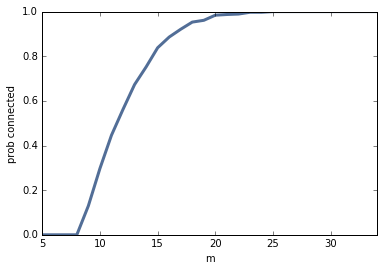

In [807]:
n=10
m = range(5,35)
pstar = np.log(n) / n
ys = [prob_connected_m(n, i, 1000) for i in m]

for i, y in zip(m, ys):
    print(i, y)
    
thinkplot.vlines([pstar], 0, 1, color='gray')
thinkplot.plot(m, ys)
thinkplot.config(xlabel='m', ylabel='prob connected', xscale='linear', xlim=[m[0], m[-1]])
plt.savefig('chap02-51.pdf')

'''The slope of the figure is definitely more smooth than the figure obtained from the first type of ER graph.
The probabilties started to increase more and more slowly'''

In [ ]:
'''
I am very interested in how complexity science applies to decentralized systems and to user-to-user platforms. I am thinking
about doing my final project on one of these two topics. It seems like most people agree that complexity science produces good
models that give logical and powerful results especially with systems of more than 2 objects. However, some conservative
scientists may not consider complexity science as a real science due to the fact that it often uses computations instead of
rigorous mathematical/physical analysis. In these debates, the integrity of classical sciences is at stake. If results produced
by complexity science models are eventually considered valid and in some form physical theories, that threatens the credibility
of results from traditional scientific experiments. Growing up in China, the culture was mostly conservative. Throughout my
educational career in China, I have always been taught the traditional scientific model of thinking where everything has to be
backed up by natural laws or mathematical equations. Therefore, the idea of complexity science is pretty much brand new to me.
I hold a critical attitude toward the subject. I do believe in most of the claims that has been made about this subject. However,
it is going to take some hands-on experience to fully pull me into the complexity science camp. I hope to gain more insight into
the power of complexity science by the end of the semester and to come out of the class with a renewed take on this upcoming
subject.
'''